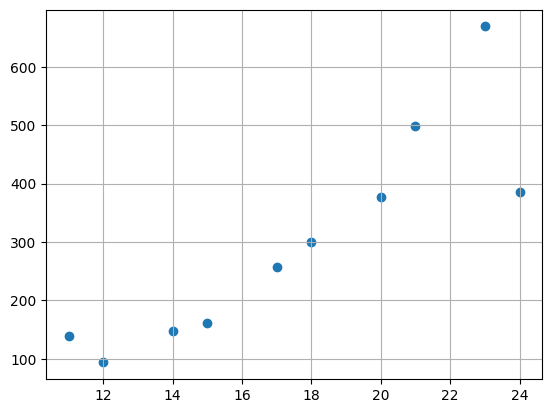

In [104]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
    
x = data[:,0]
y = data[:,1]

plt.figure()
plt.scatter(x, y)
plt.grid()


In [105]:
standard_scaler = StandardScaler()
data = standard_scaler.fit_transform(data)
basicData = data

In [106]:
x = data[:,0]
y = data[:,1]
print(x)
print(y)
x.shape = [-1,1]

poly_features = PolynomialFeatures(degree=6)
X = poly_features.fit_transform(x)
X = X.T
print(X)


[-1.5215349  -1.2874526  -0.819288   -0.58520573 -0.11704115  0.11704115
  0.58520573  0.819288    1.2874526   1.5215349 ]
[-0.94088185 -1.2061514  -0.8955272  -0.81915236 -0.2605963  -0.01387571
  0.42845708  1.1243383   2.1084554   0.47493395]
[[ 1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
   1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
   1.0000000e+00  1.0000000e+00]
 [-1.5215349e+00 -1.2874526e+00 -8.1928802e-01 -5.8520573e-01
  -1.1704115e-01  1.1704115e-01  5.8520573e-01  8.1928802e-01
   1.2874526e+00  1.5215349e+00]
 [ 2.3150685e+00  1.6575341e+00  6.7123288e-01  3.4246576e-01
   1.3698630e-02  1.3698630e-02  3.4246576e-01  6.7123288e-01
   1.6575341e+00  2.3150685e+00]
 [-3.5224576e+00 -2.1339965e+00 -5.4993308e-01 -2.0041293e-01
  -1.6033034e-03  1.6033034e-03  2.0041293e-01  5.4993308e-01
   2.1339965e+00  3.5224576e+00]
 [ 5.3595424e+00  2.7474194e+00  4.5055357e-01  1.1728279e-01
   1.8765246e-04  1.8765246e-04  1.1728279e-01  4.5055357e-01
  

In [107]:
def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta):
    hFunResult = h_fun(X, theta)
    c = hFunResult - y
    gf = np.square(c)
    suma = np.sum(np.square(hFunResult - y))
    
    size = hFunResult.shape[1]
    return (1/(2*size)) * suma

def get_theta(X, y, eps, alpha): 
    theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
    cost = 1
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        m = h_y_diff.shape[1]
        theta = theta - ((alpha * gradient.T) / m) 
        
        previousCost = cost
        cost = calculate(X, y, theta)
        
        if abs(previousCost - cost) < eps:
            break
    return cost,theta
cost, theta = get_theta(X, y, 1e-10, 1e-3)
print("cost", cost)
print("theta", theta)

cost 0.0019120695384699127
theta [[-0.1677392 ]
 [ 0.53845841]
 [-0.13920794]
 [ 1.61699537]
 [ 0.98309234]
 [-0.71091863]
 [-0.40416337]]


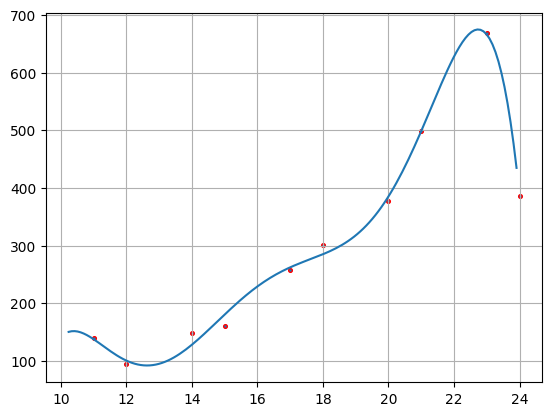

In [108]:
x_smooth = np.linspace(-1.7,1.5, 150)
x_smooth.shape = [-1,1]
poly_features = PolynomialFeatures(degree=6)
xForPolynomial = poly_features.fit_transform(x_smooth)
xForPolynomial = xForPolynomial.T
yForPolynomial = h_fun(xForPolynomial, theta)


oldData = standard_scaler.inverse_transform(data)
#print(oldData)

#print(xForPolynomial[1])
#print(yForPolynomial[0])
calculateXY = np.column_stack((xForPolynomial[1], yForPolynomial[0]))
calculateXYBig = standard_scaler.inverse_transform(calculateXY)


plt.figure()
plt.plot(calculateXYBig[:,0], calculateXYBig[:,1])
plt.scatter(oldData[:,0],oldData[:,1],edgecolors='r', s=7)
plt.grid("on")

[[ 10.       94.19154]
 [ 13.      145.61594]
 [ 16.      199.77783]
 [ 19.      370.809  ]
 [ 22.      383.8684 ]]
[[-1.4142135  -1.2262154 ]
 [-0.70710677 -0.7903178 ]
 [ 0.         -0.33121583]
 [ 0.70710677  1.1185256 ]
 [ 1.4142135   1.2292235 ]]
[[-1.5215349  -0.94088185]
 [-1.2874526  -1.2061514 ]
 [-0.819288   -0.8955272 ]
 [-0.58520573 -0.81915236]
 [-0.11704115 -0.2605963 ]
 [ 0.11704115 -0.01387571]
 [ 0.58520573  0.42845708]
 [ 0.819288    1.1243383 ]
 [ 1.2874526   2.1084554 ]
 [ 1.5215349   0.47493395]]


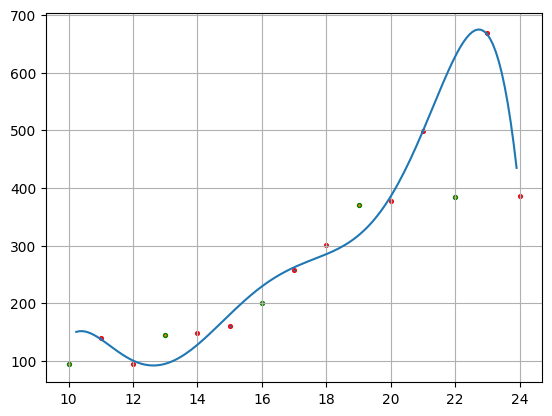

In [125]:
with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    extraData = [row for row in csvreader]
    extraData = np.array(extraData, dtype=np.float32)
    
  
x = extraData[:,0]
y = extraData[:,1]

print(extraData)

plt.figure()
plt.plot(calculateXYBig[:,0], calculateXYBig[:,1])
plt.scatter(oldData[:,0],oldData[:,1],edgecolors='r', s=7)
plt.scatter(extraData[:,0], extraData[:,1], edgecolors='g', s=8)
plt.grid("on")


extraData = standard_scaler.fit_transform(extraData)
print(extraData)
print(data)

In [127]:

allData = np.concatenate((basicData, extraData), axis=0)
allDataX = allData[:,0]
allDatay = allData[:,1]
allDatay = allDatay.T
print(allDatay)

allDataX.shape = [-1,1]
allDataX = poly_features.fit_transform(allDataX).T
yforExtraData = h_fun(allDataX, theta)
print(yforExtraData)
costAllData = calculate(allDataX, allDatay, theta)
print("koszt: ", costAllData)

[-0.94088185 -1.2061514  -0.8955272  -0.81915236 -0.2605963  -0.01387571
  0.42845708  1.1243383   2.1084554   0.47493395 -1.2262154  -0.7903178
 -0.33121583  1.1185256   1.2292235 ]
[[-0.95356174 -1.16731103 -1.00844218 -0.70672883 -0.23506142 -0.103864
   0.47403544  1.12749408  2.09121013  0.48189998 -1.06057839 -0.86885841
  -0.1677392   0.78467737  1.56639282]]
koszt:  0.010790268602372484


In [130]:
with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    extraData = [row for row in csvreader]
    extraData = np.array(extraData, dtype=np.float32)

extraData = standard_scaler.fit_transform(extraData)

extraX = extraData[:,0]
extray = extraData[:,1]
extraX.shape=[-1,1]
extraX = poly_features.fit_transform(extraX)
extraX = extraX.T
print(extraX)

extraCost = calculate(extraX, extray, theta)
print("koszt: ",extraCost)


[-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]
[-1.2262154  -0.7903178  -0.33121583  1.1185256   1.2292235 ]
[[ 1.          1.          1.          1.          1.        ]
 [-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]
 [ 1.9999999   0.49999997  0.          0.49999997  1.9999999 ]
 [-2.8284268  -0.35355335  0.          0.35355335  2.8284268 ]
 [ 3.9999995   0.24999997  0.          0.24999997  3.9999995 ]
 [-5.6568537  -0.17677668  0.          0.17677668  5.6568537 ]
 [ 7.999999    0.12499999  0.          0.12499999  7.999999  ]]
koszt:  0.02854666673017763


cost 0.038314007433960726
theta [[-0.16348977]
 [ 0.54229215]
 [-0.1654985 ]
 [ 1.60971992]
 [ 1.01011064]
 [-0.70839874]
 [-0.4113312 ]]


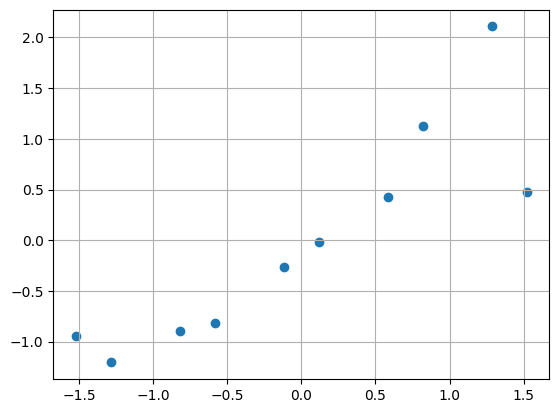

In [146]:
with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

data = standard_scaler.fit_transform(data)
    
x = data[:,0]
y = data[:,1]

plt.figure()
plt.scatter(x, y)
plt.grid()

def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta, lambda_):
    hFunResult = h_fun(X, theta)
    size = hFunResult.shape[1]
    lin_reg_cost = np.sum(np.square(hFunResult - y))
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return lin_reg_cost + sum_of_thetas * lambda_ / (2 * size)

def get_theta(X, y, eps, alpha, lambda_): 
    theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
    cost = 1
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradients = h_y_diff @ X.T
        
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        m = h_y_diff.shape[1]
        theta = theta - alpha * (gradients.T + lambda_ * theta_reg) / m
        
        #m = h_y_diff.shape[1]
        #theta = theta - ((alpha * gradients.T) / m) 
        
        previousCost = cost
        cost = calculate(X, y, theta, lambda_)
        
        if abs(previousCost - cost) < eps:
            break
    return cost,theta
cost, theta = get_theta(X, y, 1e-10, 1e-3, 0.001)
print("cost", cost)
print("theta", theta)



In [149]:
def plowPolynomial():
    x_smooth = np.linspace(-1.7,1.5, 150)
    x_smooth.shape = [-1,1]
    poly_features = PolynomialFeatures(degree=6)
    xForPolynomial = poly_features.fit_transform(x_smooth)
    xForPolynomial = xForPolynomial.T
    yForPolynomial = h_fun(xForPolynomial, theta)
    
    
    oldData = standard_scaler.inverse_transform(data)
    #print(oldData)
    
    #print(xForPolynomial[1])
    #print(yForPolynomial[0])
    calculateXY = np.column_stack((xForPolynomial[1], yForPolynomial[0]))
    calculateXYBig = standard_scaler.inverse_transform(calculateXY)
    
    
    plt.figure()
    plt.plot(calculateXYBig[:,0], calculateXYBig[:,1])
    plt.scatter(oldData[:,0],oldData[:,1],edgecolors='r', s=7)
    plt.grid("on")

In [148]:
cost, theta = get_theta(X, y, 1e-10, 1e-3, 0.01)
print("cost", cost)
print("theta", theta)


cost 0.042650620922438674
theta [[-0.17577668]
 [ 0.58388825]
 [-0.07732695]
 [ 1.53240187]
 [ 0.91221823]
 [-0.68180967]
 [-0.38418125]]


NameError: name 'plowPolynomial' is not defined

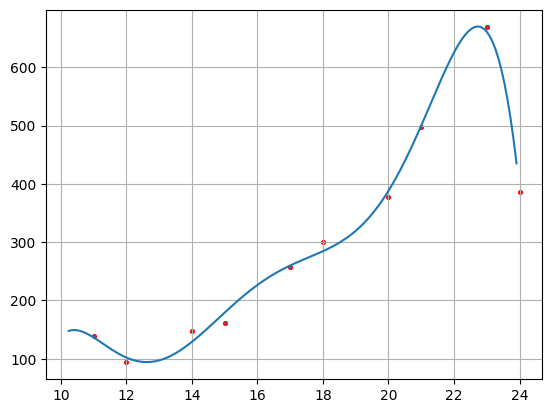

In [150]:
plowPolynomial()

cost 0.1183980373182874
theta [[-0.20900361]
 [ 0.79117043]
 [ 0.21492099]
 [ 1.11100364]
 [ 0.55752146]
 [-0.53256455]
 [-0.28120724]]


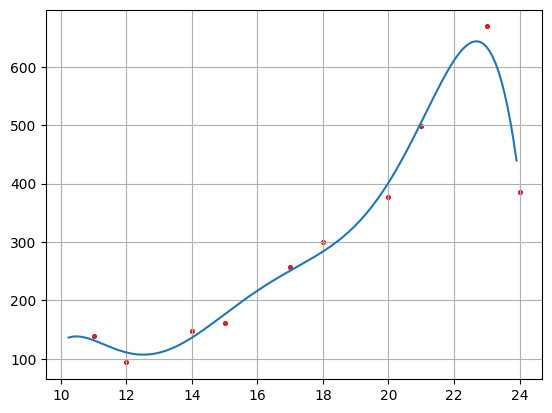

In [151]:
cost, theta = get_theta(X, y, 1e-10, 1e-3, 0.1)
print("cost", cost)
print("theta", theta)
plowPolynomial()

cost 0.7220494901662189
theta [[-0.14258654]
 [ 0.80014342]
 [ 0.24031313]
 [ 0.54430039]
 [ 0.24784903]
 [-0.27189062]
 [-0.15248976]]


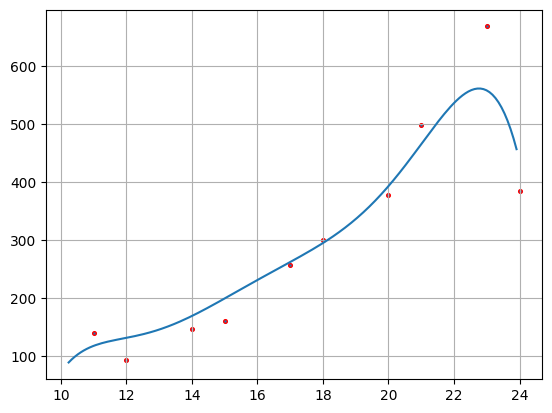

In [152]:
cost, theta = get_theta(X, y, 1e-10, 1e-3, 1)
print("cost", cost)
print("theta", theta)
plowPolynomial()

cost 3.8293766421396387
theta [[-0.01670471]
 [ 0.26825932]
 [ 0.05501987]
 [ 0.18070133]
 [ 0.04897917]
 [ 0.00968257]
 [-0.03562528]]


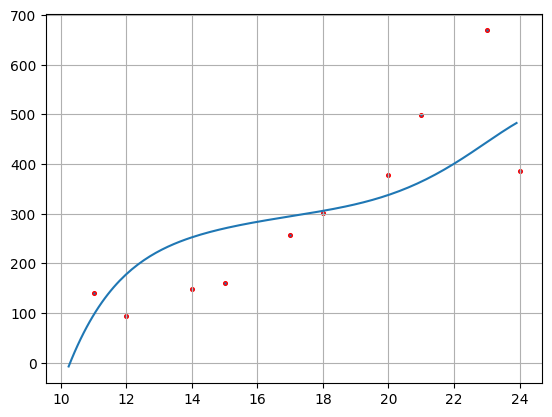

In [153]:
cost, theta = get_theta(X, y, 1e-10, 1e-3, 10)
print("cost", cost)
print("theta", theta)
plowPolynomial()